In [222]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [223]:
# Load Data
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv'
                      @)

### 1. Exploratory Data Analysis

#### Load and Examine the Data
- [ ] **Load Training Data**: Load `train.csv` and inspect the first few rows.
- [ ] **Understand the Structure**: Check data types, summary statistics, and null values.
- [ ] **Time Range Check**: Confirm the date range in the dataset and compare it with the testing period.

#### Analyze Missing Values
- [ ] **Identify Missing Patterns**: Check for missing values per feature, including time-based patterns.
- [ ] **Visualize Missing Data**: Use a heatmap or line plot to show missing values over time for each feature.

#### Distribution and Outliers
- [ ] **Plot Distributions**: Plot histograms or boxplots for each pollutant to understand their distributions and detect outliers.
- [ ] **Time Series Patterns**: Plot time series for each pollutant (over days, weeks, months) to observe trends, seasonality, and anomalies.

#### Correlation Analysis
- [ ] **Correlation Matrix**: Compute and plot correlations between pollutants to identify relationships.
- [ ] **Autocorrelation**: Calculate autocorrelation for each pollutant to understand its temporal dependency.

#### Trend and Seasonality Analysis
- [ ] **Seasonal Decomposition**: Decompose the time series data to separate trend, seasonality, and residuals for each pollutant.
- [ ] **Monthly/Weekly Patterns**: Group data by month, week, and day to detect any seasonal patterns in pollutant levels.
- [ ] **Hour of Day Patterns**: Analyze if pollutant levels vary significantly across different hours of the day.

In [224]:
# Preview the data
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
train_df.head()

Train Data Shape: (40991, 6)
Test Data Shape: (504, 1)


,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2020-01-01 00,42.9,0.718,15.7,73.1,64.4
1,2020-01-01 01,33.6,0.587,10.1,74.8,66.0
2,2020-01-01 02,29.3,NaN,5.1,51.0,44.9
3,2020-01-01 03,30.5,0.246,7.2,27.7,25.1
4,2020-01-01 04,29.3,0.204,8.3,15.3,13.6


In [225]:
# Convert 'id' column to datetime and set it as the index
train_df['id'] = pd.to_datetime(train_df['id'], format='%Y-%m-%d %H')
test_df['id'] = pd.to_datetime(test_df['id'], format='%Y-%m-%d %H')
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)

# Basic Summary
print("\nBasic Info:")
print(train_df.info())
print("\nSummary Statistics:")
print(train_df.describe())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40991 entries, 2020-01-01 00:00:00 to 2024-09-03 22:00:00
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   valeur_NO2   37694 non-null  float64
 1   valeur_CO    28462 non-null  float64
 2   valeur_O3    40298 non-null  float64
 3   valeur_PM10  33824 non-null  float64
 4   valeur_PM25  39200 non-null  float64
dtypes: float64(5)
memory usage: 1.9 MB
None

Summary Statistics:
         valeur_NO2     valeur_CO     valeur_O3   valeur_PM10   valeur_PM25
count  37694.000000  28462.000000  40298.000000  33824.000000  39200.000000
mean      21.831528      0.200710     50.574349     18.221523     11.051161
std       14.658381      0.103691     26.488626     11.282385      8.151742
min        1.100000      0.037000     -1.900000      0.500000      0.000000
25%       11.300000      0.145000     33.000000     10.700000      5.800000
50%       17.600000      0.1


Missing Values per Column:
valeur_NO2      3297
valeur_CO      12529
valeur_O3        693
valeur_PM10     7167
valeur_PM25     1791
dtype: int64


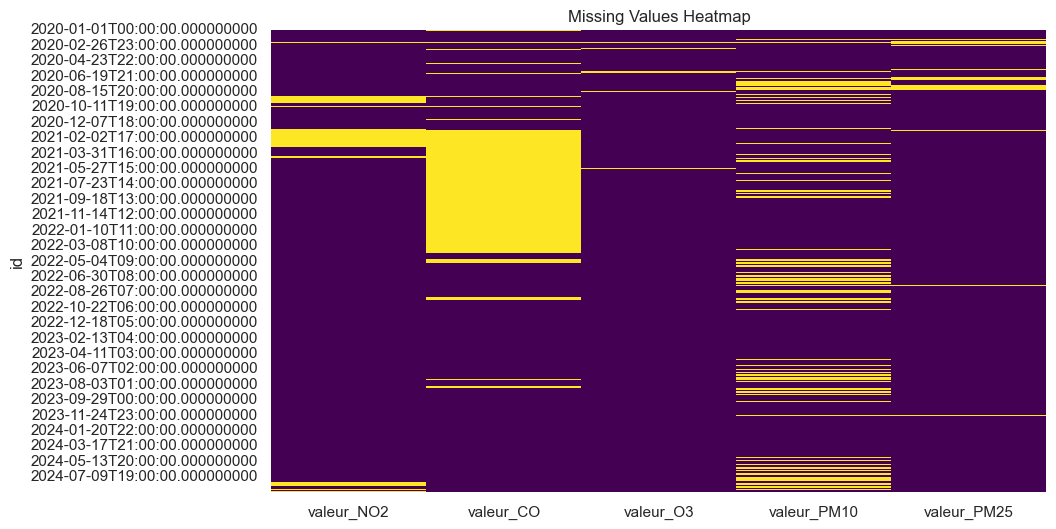

In [226]:
# Missing Value Analysis
missing_values = train_df.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Visualize Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

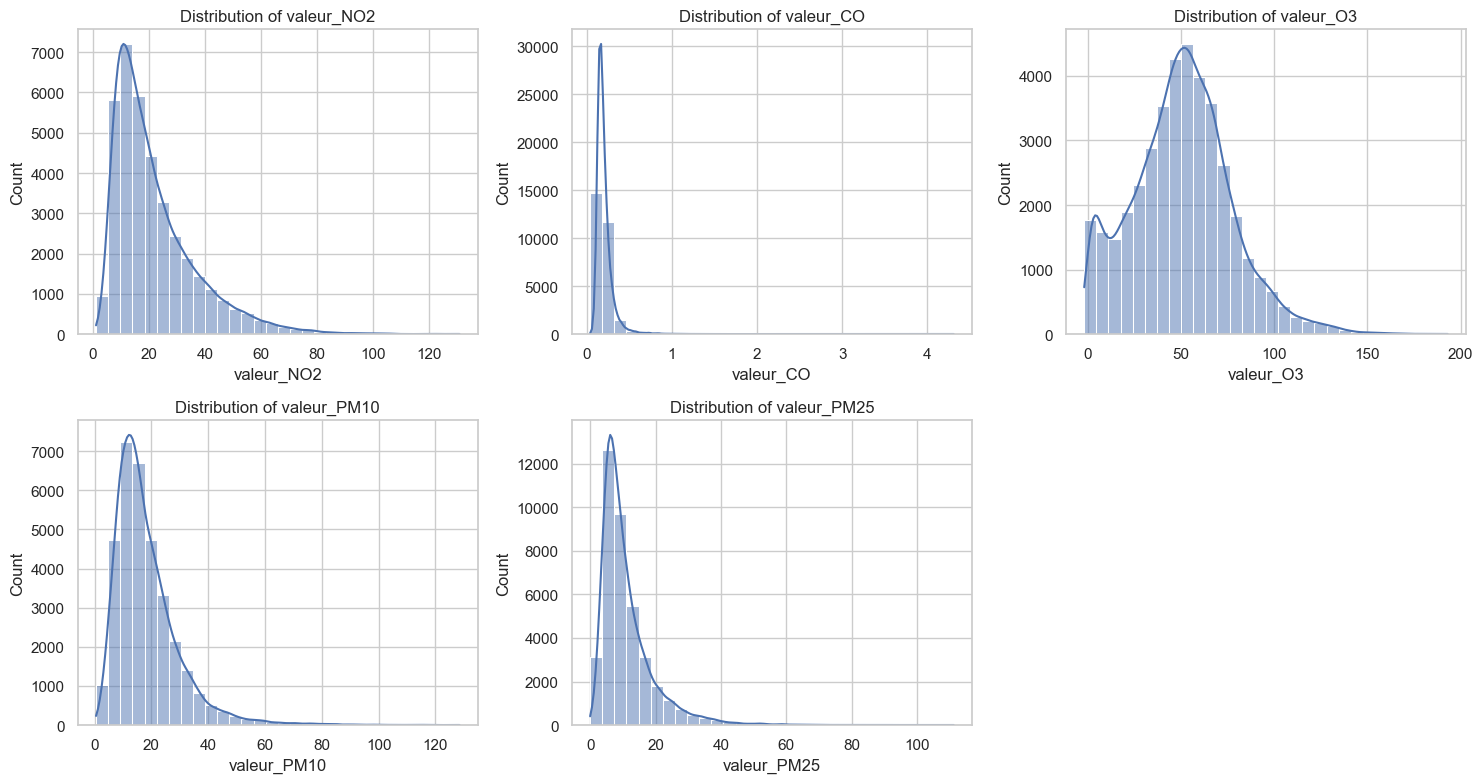

In [227]:
# Plot histograms for each pollutant
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

plt.figure(figsize=(15, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[pollutant].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {pollutant}')
plt.tight_layout()
plt.show()

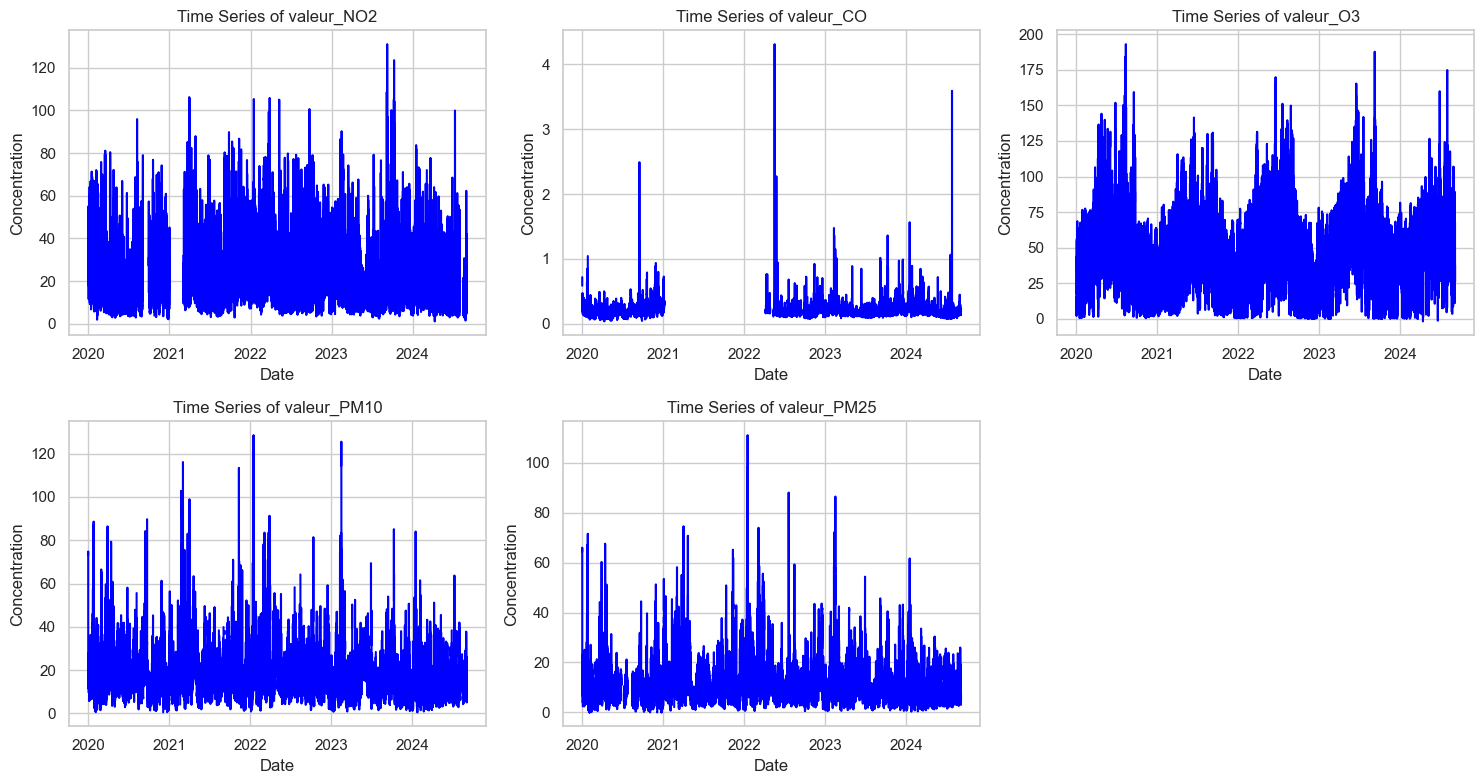

In [228]:
# Plot time series for each pollutant
plt.figure(figsize=(15, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    plt.plot(train_df[pollutant], color='blue')
    plt.title(f'Time Series of {pollutant}')
    plt.xlabel("Date")
    plt.ylabel("Concentration")
plt.tight_layout()
plt.show()

In [231]:
# Compute correlation matrix
correlation_matrix = train_df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
             valeur_NO2  valeur_CO  valeur_O3  valeur_PM10  valeur_PM25
valeur_NO2     1.000000   0.707436  -0.641281     0.509953     0.520438
valeur_CO      0.707436   1.000000  -0.482845     0.531823     0.627073
valeur_O3     -0.641281  -0.482845   1.000000    -0.208749    -0.296609
valeur_PM10    0.509953   0.531823  -0.208749     1.000000     0.887796
valeur_PM25    0.520438   0.627073  -0.296609     0.887796     1.000000


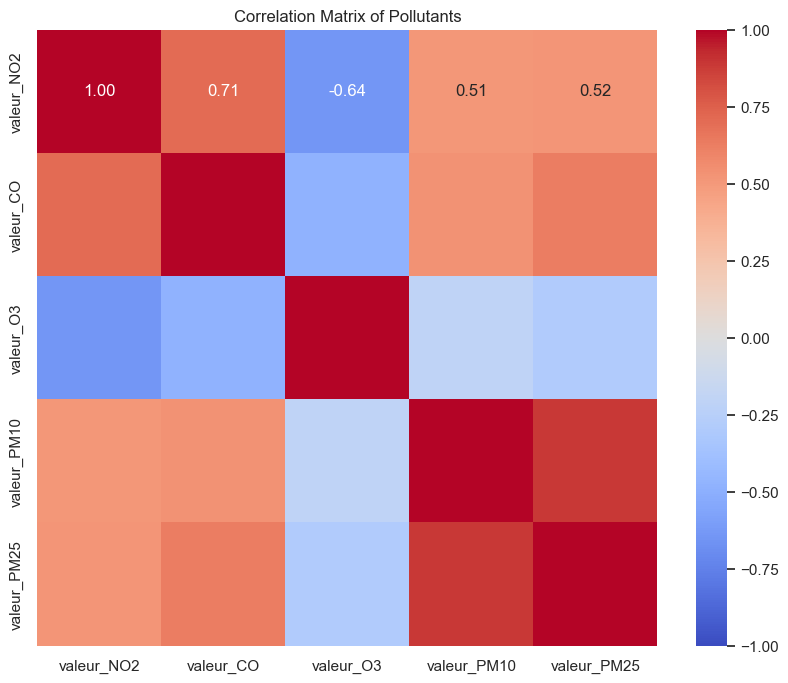

In [234]:
# Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title("Correlation Matrix of Pollutants")
plt.show()

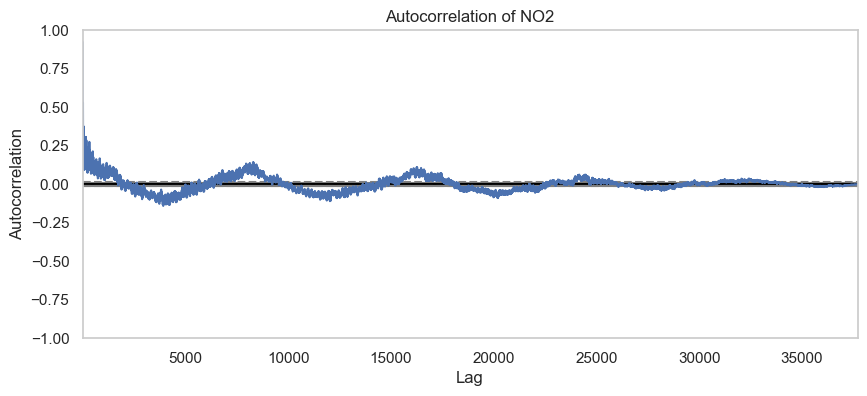

In [208]:
# Autocorrelation (for a selected pollutant, e.g., NO2)
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 4))
autocorrelation_plot(train_df['valeur_NO2'].dropna())
plt.title("Autocorrelation of NO2")
plt.show()

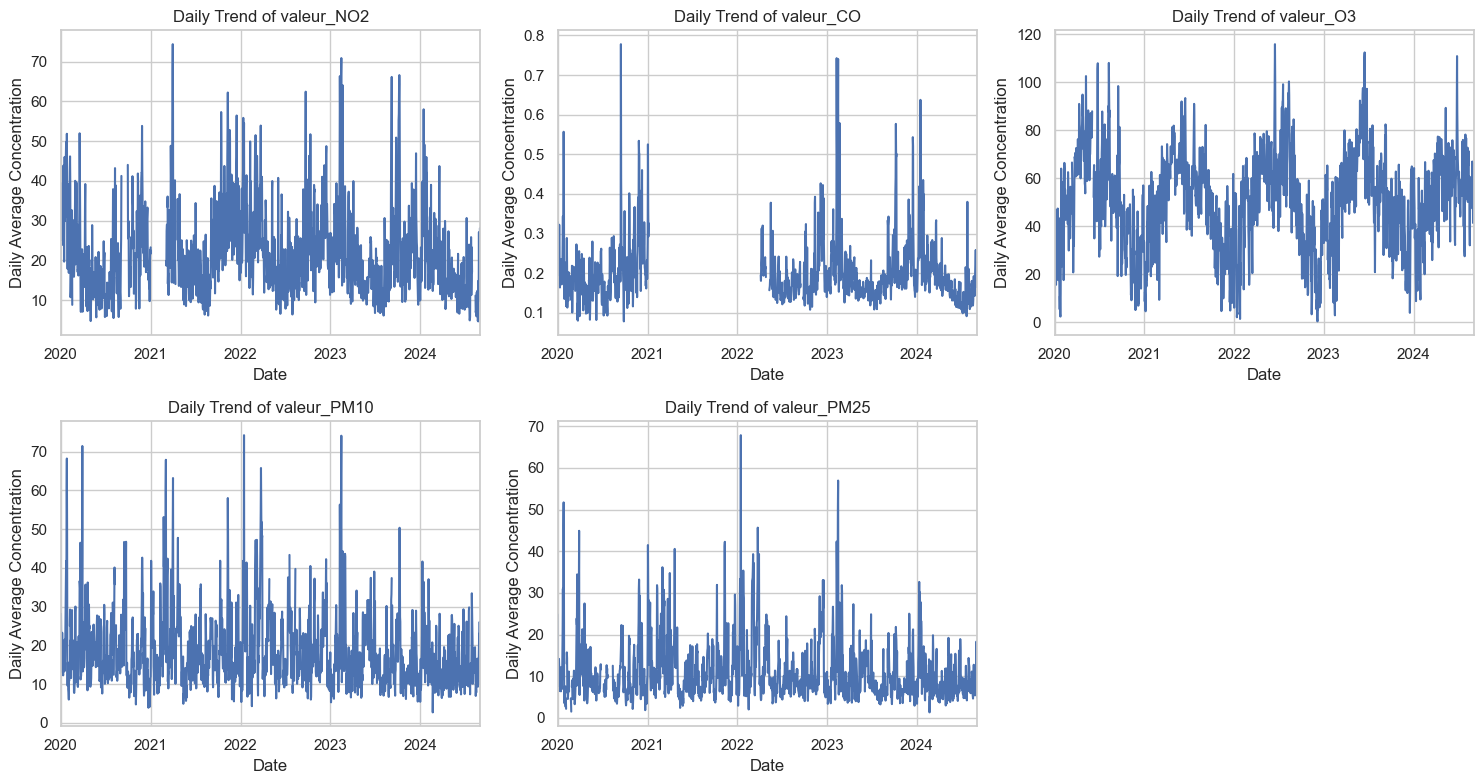

In [209]:
# Resample data to daily means to observe trends
daily_df = train_df[pollutants].resample('D').mean()

# Plot daily trends for each pollutant
plt.figure(figsize=(15, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    daily_df[pollutant].plot()
    plt.title(f'Daily Trend of {pollutant}')
    plt.xlabel("Date")
    plt.ylabel("Daily Average Concentration")
plt.tight_layout()
plt.show()

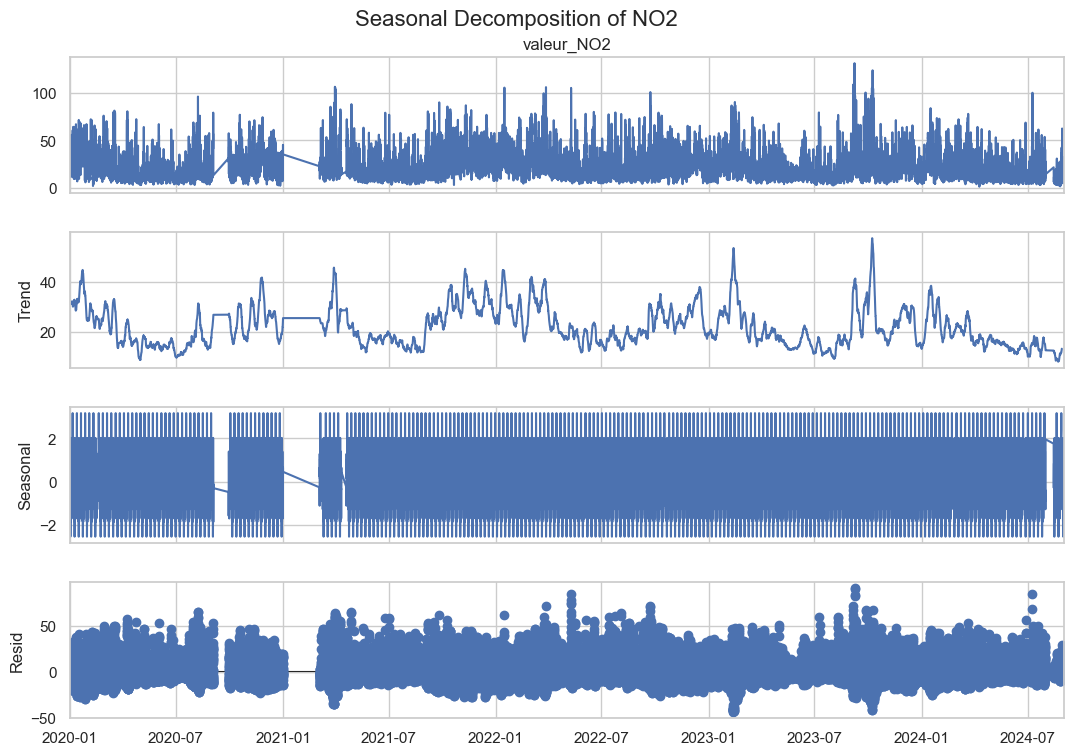

In [210]:
# Seasonal Decomposition for one pollutant (e.g., NO2)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_df['valeur_NO2'].dropna(), model='additive', period=24*7)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle("Seasonal Decomposition of NO2", fontsize=16)
plt.show()

In [211]:
# Extract date components
train_df['year'] = train_df.index.year
train_df['month'] = train_df.index.month
train_df['day'] = train_df.index.day
train_df['hour'] = train_df.index.hour

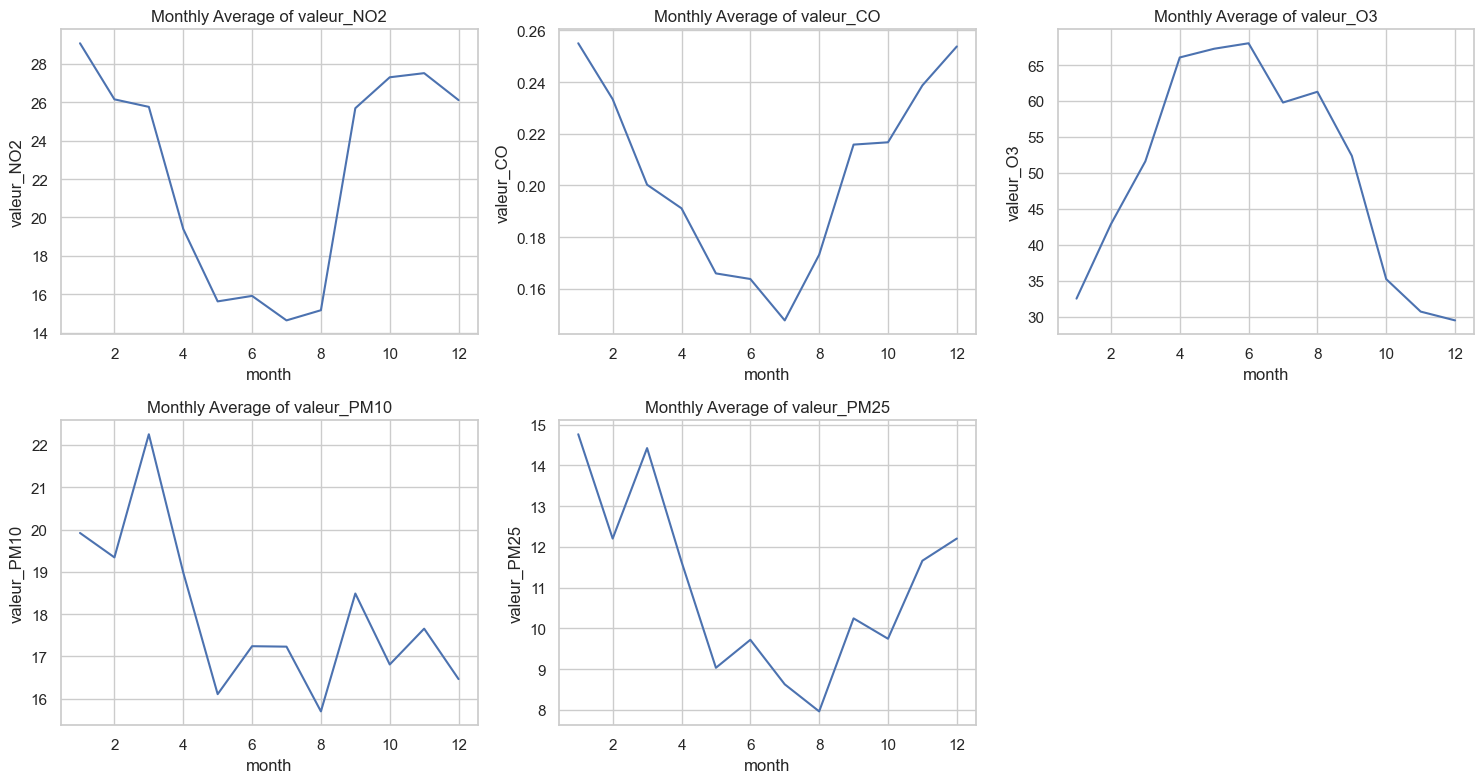

In [212]:
# Monthly average plot for each pollutant
plt.figure(figsize=(15, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(data=train_df, x='month', y=pollutant, estimator='mean', ci=None)
    plt.title(f'Monthly Average of {pollutant}')
plt.tight_layout()
plt.show()

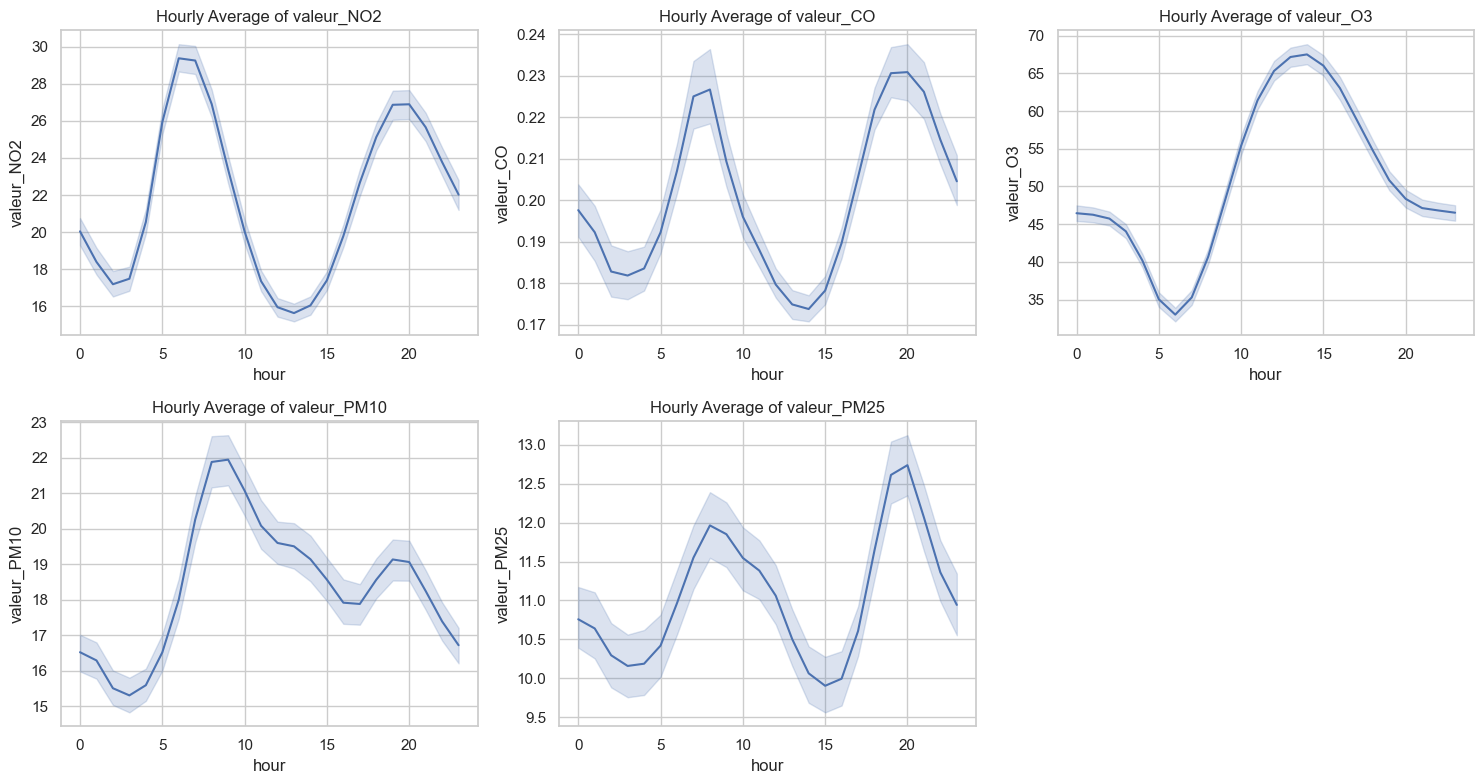

In [213]:
# Hourly average plot for each pollutant
plt.figure(figsize=(15, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(data=train_df, x='hour', y=pollutant, estimator='mean')
    plt.title(f'Hourly Average of {pollutant}')
plt.tight_layout()
plt.show()
